In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import os


# Kurie miestai turi aukščiausias ir žemiausias metines temperatūras?
# Kurie mėnesiai yra karščiausi ir šalčiausi?
# Kurie mėnesiai ir vieta buvo šalčiausia/karščiausi Antro Pasaulinio karo metu?
# Apskaičiuoti mėnesinių, savaitinių temperatūrų vidurkius bei 7/10/14 dienų slenkančius vidurkius. Pabandykite vizualizuoti šią informaciją.
# Gaukite paskutines mėnesio, savaitės dienų temperatūras?
# Užpildykite trūkstamas reikšmes naudodami  išmoktus interpolacijos metodus.
# Agreguokite duomenis savaitės lygiu. 
# Ištraukite iš datų metus, mėnesius, savaites, dienas.

In [2]:
temp1 = pd.read_csv('temperature.csv')
temp1.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [3]:
temp1['datetime'] = pd.to_datetime(temp1['datetime'])

In [4]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           45253 non-null  datetime64[ns]
 1   Vancouver          44458 non-null  float64       
 2   Portland           45252 non-null  float64       
 3   San Francisco      44460 non-null  float64       
 4   Seattle            45250 non-null  float64       
 5   Los Angeles        45250 non-null  float64       
 6   San Diego          45252 non-null  float64       
 7   Las Vegas          45252 non-null  float64       
 8   Phoenix            45250 non-null  float64       
 9   Albuquerque        45252 non-null  float64       
 10  Denver             45252 non-null  float64       
 11  San Antonio        45252 non-null  float64       
 12  Dallas             45249 non-null  float64       
 13  Houston            45250 non-null  float64       
 14  Kansas

In [5]:
temp = pd.melt(temp1, id_vars ='datetime', var_name = 'city', value_name = 'temperature')
temp.head()

,datetime,city,temperature
0,2012-10-01 12:00:00,Vancouver,NaN
1,2012-10-01 13:00:00,Vancouver,284.630000
2,2012-10-01 14:00:00,Vancouver,284.629041
3,2012-10-01 15:00:00,Vancouver,284.626998
4,2012-10-01 16:00:00,Vancouver,284.624955


In [6]:
temp['newtemp'] = temp['temperature'] - 273.16

In [7]:
temp['year'] = temp['datetime'].dt.year
temp

,datetime,city,temperature,newtemp,year
0,2012-10-01 12:00:00,Vancouver,NaN,NaN,2012
1,2012-10-01 13:00:00,Vancouver,284.630000,11.470000,2012
2,2012-10-01 14:00:00,Vancouver,284.629041,11.469041,2012
3,2012-10-01 15:00:00,Vancouver,284.626998,11.466998,2012
4,2012-10-01 16:00:00,Vancouver,284.624955,11.464955,2012
...,...,...,...,...,...
1629103,2017-11-29 20:00:00,Jerusalem,NaN,NaN,2017
1629104,2017-11-29 21:00:00,Jerusalem,NaN,NaN,2017
1629105,2017-11-29 22:00:00,Jerusalem,NaN,NaN,2017
1629106,2017-11-29 23:00:00,Jerusalem,NaN,NaN,2017


In [8]:
# Kurie miestai turi aukščiausias ir žemiausias metines temperatūras?

In [9]:
temp.groupby(['city'])['newtemp'].agg(['max', 'min']).sort_values(by = ['max'], ascending = False)

,max,min
city,,
Phoenix,48.06,-7.101000
Tel Aviv District,47.77,-2.111000
Haifa,47.77,-2.010000
Eilat,46.99,-2.010000
Las Vegas,45.48,-12.598667
Jerusalem,43.88,-0.186000
Los Angeles,42.31,-6.656333
Beersheba,41.66,-0.981000
Dallas,41.24,-11.549667


In [10]:
temp.groupby(['city'])['newtemp'].agg(['max', 'min']).sort_values(by = ['min'])

,max,min
city,,
Minneapolis,35.08,-30.823333
Montreal,34.72,-29.860000
Detroit,34.89,-29.676667
Indianapolis,38.88,-28.293667
Vancouver,33.84,-28.010000
Toronto,34.12,-25.860000
Denver,40.59,-25.432333
Chicago,35.32,-24.270000
Pittsburgh,33.13,-23.737333


In [11]:
# Kurie mėnesiai yra karščiausi ir šalčiausi?

In [12]:
temp['month'] = temp['datetime'].dt.month
temp

,datetime,city,temperature,newtemp,year,month
0,2012-10-01 12:00:00,Vancouver,NaN,NaN,2012,10
1,2012-10-01 13:00:00,Vancouver,284.630000,11.470000,2012,10
2,2012-10-01 14:00:00,Vancouver,284.629041,11.469041,2012,10
3,2012-10-01 15:00:00,Vancouver,284.626998,11.466998,2012,10
4,2012-10-01 16:00:00,Vancouver,284.624955,11.464955,2012,10
...,...,...,...,...,...,...
1629103,2017-11-29 20:00:00,Jerusalem,NaN,NaN,2017,11
1629104,2017-11-29 21:00:00,Jerusalem,NaN,NaN,2017,11
1629105,2017-11-29 22:00:00,Jerusalem,NaN,NaN,2017,11
1629106,2017-11-29 23:00:00,Jerusalem,NaN,NaN,2017,11


In [13]:
temp.groupby('month')['newtemp'].max().sort_values(ascending = False)

month
6     48.06
9     47.77
7     46.99
8     45.99
5     43.96
10    43.32
4     39.99
11    39.43
3     36.52
12    36.10
1     34.99
2     33.88
Name: newtemp, dtype: float64

In [14]:
temp.groupby('month')['newtemp'].min().sort_values()

month
1    -30.823333
2    -29.860000
12   -29.770000
11   -28.010000
3    -26.640000
4    -13.890000
10    -9.415000
5     -7.276000
9     -1.989667
6      4.240000
8      5.904000
7      7.760000
Name: newtemp, dtype: float64

In [15]:
# Apskaičiuoti mėnesinių, savaitinių temperatūrų vidurkius bei 7/10/14 dienų slenkančius vidurkius. Pabandykite vizualizuoti šią informaciją.

In [16]:
temp

,datetime,city,temperature,newtemp,year,month
0,2012-10-01 12:00:00,Vancouver,NaN,NaN,2012,10
1,2012-10-01 13:00:00,Vancouver,284.630000,11.470000,2012,10
2,2012-10-01 14:00:00,Vancouver,284.629041,11.469041,2012,10
3,2012-10-01 15:00:00,Vancouver,284.626998,11.466998,2012,10
4,2012-10-01 16:00:00,Vancouver,284.624955,11.464955,2012,10
...,...,...,...,...,...,...
1629103,2017-11-29 20:00:00,Jerusalem,NaN,NaN,2017,11
1629104,2017-11-29 21:00:00,Jerusalem,NaN,NaN,2017,11
1629105,2017-11-29 22:00:00,Jerusalem,NaN,NaN,2017,11
1629106,2017-11-29 23:00:00,Jerusalem,NaN,NaN,2017,11


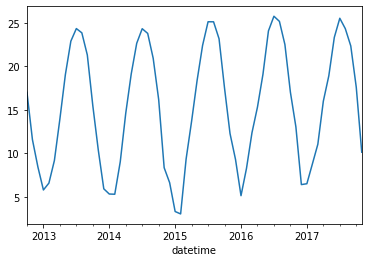

In [17]:
temp.set_index('datetime').resample('M').mean()['newtemp'].plot()

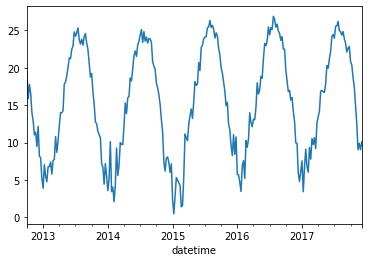

In [18]:
temp.set_index('datetime').resample('W').mean()['newtemp'].plot()

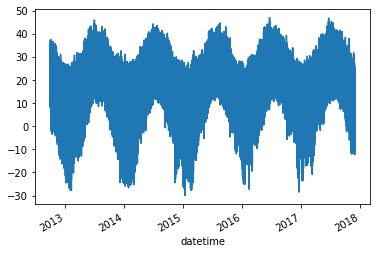

In [19]:
temp.set_index('datetime').rolling(7).mean()['newtemp'].plot()

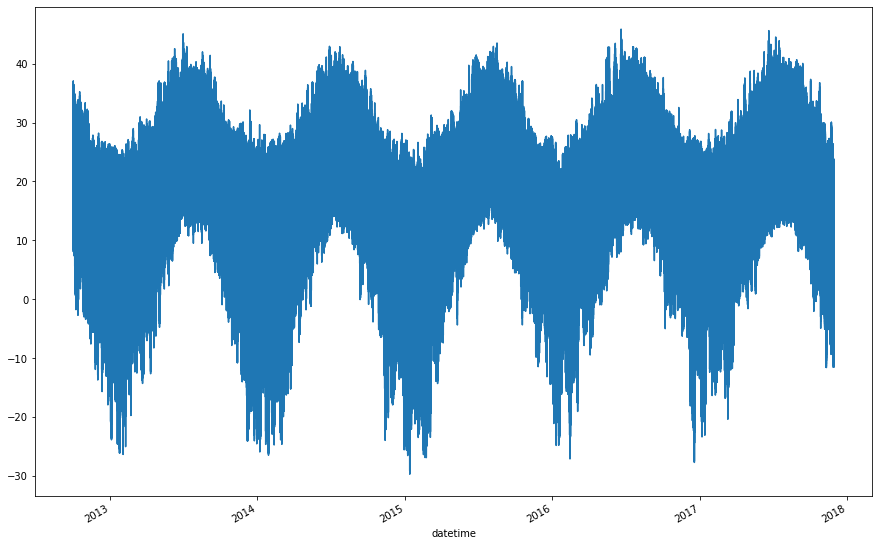

In [20]:
temp.set_index('datetime').rolling(10, center = True).mean()['newtemp'].plot(figsize=(15, 10))

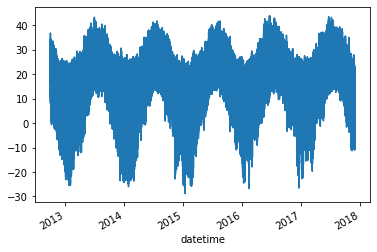

In [21]:
temp.set_index('datetime').rolling(14, center = True).mean()['newtemp'].plot()

In [22]:
temp1.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [23]:
# Gaukite paskutines mėnesio, savaitės dienų temperatūras?

In [24]:
temp1.set_index('datetime').asfreq('M')

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-31 12:00:00,284.260,286.55,284.400,285.16,286.350,285.230,284.800,286.75,280.150,279.37,...,280.600,285.790,286.46,288.060,307.040,301.12,307.87,300.900,300.900,302.46
2012-11-30 12:00:00,282.950,280.90,286.270,279.34,285.830,286.890,286.210,286.45,274.850,275.69,...,271.100,273.970,264.39,272.340,292.600,293.93,292.42,294.750,294.750,293.93
2012-12-31 12:00:00,274.490,274.65,276.910,274.84,278.500,280.290,274.580,278.73,269.400,266.03,...,272.120,271.770,262.61,270.210,294.260,289.50,292.75,290.200,290.200,289.50
2013-01-31 12:00:00,277.985,279.43,280.605,280.46,280.965,280.225,278.795,278.34,268.485,261.66,...,278.225,277.375,273.15,274.615,286.800,286.83,294.15,285.980,286.000,286.89
2013-02-28 12:00:00,276.030,278.27,278.140,277.43,282.420,283.530,276.970,281.05,264.920,265.48,...,279.150,279.130,273.70,277.640,291.300,292.79,304.03,290.800,290.800,291.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-30 12:00:00,286.960,288.27,286.400,285.77,290.480,290.600,298.920,299.12,288.890,285.44,...,296.000,295.360,289.41,295.130,306.810,303.16,314.34,306.380,306.250,303.11
2017-07-31 12:00:00,286.110,288.02,288.080,286.33,291.920,293.150,301.660,303.45,290.860,287.59,...,291.870,292.910,292.45,289.050,307.934,304.04,311.66,307.720,307.360,303.93
2017-08-31 12:00:00,288.720,289.67,286.270,290.71,296.840,294.490,300.970,303.28,287.010,287.94,...,291.470,291.300,287.80,286.130,303.669,302.71,309.15,304.340,304.220,302.76


In [25]:
temp1.set_index('datetime').asfreq('W')

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-07 12:00:00,281.1600,282.27,285.50000,280.01000,289.0600,288.38000,293.64,293.64000,280.35000,273.58000,...,290.00000,289.6400,282.38,288.63,304.26,301.53000,307.91,298.3000,298.3000,298.400
2012-10-14 12:00:00,284.8800,285.54,283.12000,285.60000,286.0700,286.39000,285.22,286.39000,277.91000,279.11000,...,274.03000,275.2300,272.65,273.91,304.26,302.85000,307.20,299.8000,299.8000,300.200
2012-10-21 12:00:00,280.0275,281.00,286.69375,279.62625,291.5125,291.71875,287.58,290.90875,282.88375,286.57375,...,286.03375,287.7725,285.17,291.13,303.15,300.70875,307.87,298.4625,298.4625,298.825
2012-10-28 12:00:00,279.8800,282.13,285.33000,283.69000,289.2900,288.22000,283.03,288.33000,271.52000,269.29000,...,288.42000,289.2200,284.54,281.18,304.26,299.46000,304.03,295.8000,295.8000,295.370
2012-11-04 12:00:00,283.9400,284.96,283.26000,284.58000,285.2400,285.03000,284.15,287.06000,279.42000,275.92000,...,279.04000,279.4400,276.83,279.65,305.37,302.28000,303.39,300.5900,300.5900,303.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-29 12:00:00,NaN,282.44,NaN,281.83000,289.2300,290.22000,287.04,290.36000,274.10000,279.03000,...,289.15000,NaN,282.11,287.82,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-05 12:00:00,NaN,279.90,NaN,276.65000,289.3700,286.22000,287.55,289.17000,284.48000,275.13000,...,284.57000,NaN,276.77,281.38,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-12 12:00:00,NaN,282.65,NaN,282.85000,286.0800,284.20000,282.30,287.17000,275.32000,271.26000,...,270.43000,NaN,269.80,268.69,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Užpildykite trūkstamas reikšmes naudodami išmoktus interpolacijos metodus.

In [62]:
temp.isnull().sum()

datetime        0
city            0
temperature    35
newtemp         0
year            0
month           0
dtype: int64

In [28]:
a = temp.groupby('city')['newtemp'].transform('mean')

In [29]:
temp['newtemp'] = temp['newtemp'].fillna(a)

In [60]:
b = temp.groupby(['city'])['temperature'].transform(pd.DataFrame.interpolate)

In [61]:
temp['temperature'] = temp['temperature'].fillna(b)

In [63]:
# Agreguokite duomenis savaitės lygiu. 

In [64]:
temp1.set_index('datetime').resample('W').mean()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-07,285.008019,287.436972,292.404145,285.364647,294.643467,294.500153,299.239221,300.877976,291.003271,282.981460,...,291.336710,291.751748,287.209794,289.803653,300.864606,300.641923,302.614231,300.305387,300.296323,299.397258
2012-10-14,284.720833,285.642262,288.176220,286.034792,291.513393,291.938185,293.942500,297.743244,286.328452,282.160298,...,283.179583,283.863006,280.680536,283.120714,299.440119,298.187262,300.339048,298.299524,298.299524,297.354405
2012-10-21,283.916726,285.731905,291.387708,285.012708,294.941369,294.401399,293.943333,297.619315,287.568958,285.852232,...,287.110804,287.540119,282.993378,286.240893,299.745714,298.628631,302.102054,299.615179,299.615179,299.163690
2012-10-28,279.670387,281.088631,287.071310,280.389077,292.391905,291.126429,291.052887,295.278095,285.027976,280.840952,...,287.530982,287.641905,282.580521,284.681964,298.047321,296.535149,298.135089,297.098214,297.098214,295.895357
2012-11-04,283.856786,286.729613,288.123899,285.597649,290.684137,290.443095,290.476280,294.542500,284.611756,283.178036,...,282.226012,283.918929,282.975089,284.562946,298.564702,297.144405,298.958780,298.730298,298.730298,297.678036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-05,NaN,282.027857,NaN,279.607857,290.931964,290.337083,292.585536,294.395893,285.217560,279.409107,...,285.464405,NaN,280.607880,285.368274,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-12,NaN,280.658369,NaN,279.485380,290.270946,289.394597,289.066341,293.702471,283.423558,275.543785,...,279.089446,NaN,274.141071,278.139205,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-19,NaN,281.176827,NaN,281.013458,290.806239,290.092838,287.818990,292.941582,282.835735,280.796118,...,279.489737,NaN,273.127738,277.519337,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Ištraukite iš datų metus, mėnesius, savaites, dienas.

In [67]:
temp1['datetime'].dt.year

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
45248    2017
45249    2017
45250    2017
45251    2017
45252    2017
Name: datetime, Length: 45253, dtype: int64

In [68]:
temp1['datetime'].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
45248    11
45249    11
45250    11
45251    11
45252    11
Name: datetime, Length: 45253, dtype: int64

In [69]:
temp1['datetime'].dt.week

0        40
1        40
2        40
3        40
4        40
         ..
45248    48
45249    48
45250    48
45251    48
45252    48
Name: datetime, Length: 45253, dtype: int64

In [70]:
temp1['datetime'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
45248    29
45249    29
45250    29
45251    29
45252    30
Name: datetime, Length: 45253, dtype: int64

In [71]:
# Kurie mėnesiai ir vieta buvo šalčiausia/karščiausi Antro Pasaulinio karo metu?

In [72]:
weather = pd.read_csv('datasets_3759_5944_Weather Station Locations.csv')

In [73]:
weather.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [74]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   LAT               161 non-null    object 
 4   LON               161 non-null    object 
 5   ELEV              161 non-null    int64  
 6   Latitude          161 non-null    float64
 7   Longitude         161 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


In [75]:
weather.isnull().sum()

WBAN                0
NAME                0
STATE/COUNTRY ID    0
LAT                 0
LON                 0
ELEV                0
Latitude            0
Longitude           0
dtype: int64

In [76]:
weather_summ = pd.read_csv('Summary of Weather.csv')

C:\Users\Asosi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
weather_summ

,STA,Date,MaxTemp,MinTemp,MeanTemp,Snowfall
0,10001,1942-7-1,25.555556,22.222222,23.888889,0
1,10001,1942-7-2,28.888889,21.666667,25.555556,0
2,10001,1942-7-3,26.111111,22.222222,24.444444,0
3,10001,1942-7-4,26.666667,22.222222,24.444444,0
4,10001,1942-7-5,26.666667,21.666667,24.444444,0
...,...,...,...,...,...,...
119035,82506,1945-12-27,28.333333,18.333333,23.333333,0
119036,82506,1945-12-28,29.444444,18.333333,23.888889,0
119037,82506,1945-12-29,28.333333,18.333333,23.333333,0
119038,82506,1945-12-30,28.333333,18.333333,23.333333,0


In [78]:
weather_summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [79]:
weather_summ.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [80]:
weather_summ = weather_summ[['STA','Date','WindGustSpd','MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall', 'PoorWeather']]

In [81]:
weather_summ

,STA,Date,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather
0,10001,1942-7-1,NaN,25.555556,22.222222,23.888889,0,NaN
1,10001,1942-7-2,NaN,28.888889,21.666667,25.555556,0,NaN
2,10001,1942-7-3,NaN,26.111111,22.222222,24.444444,0,NaN
3,10001,1942-7-4,NaN,26.666667,22.222222,24.444444,0,NaN
4,10001,1942-7-5,NaN,26.666667,21.666667,24.444444,0,NaN
...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,NaN,28.333333,18.333333,23.333333,0,NaN
119036,82506,1945-12-28,NaN,29.444444,18.333333,23.888889,0,1
119037,82506,1945-12-29,NaN,28.333333,18.333333,23.333333,0,1
119038,82506,1945-12-30,NaN,28.333333,18.333333,23.333333,0,NaN


In [82]:
weather_summ.isnull().sum()

STA                 0
Date                0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
dtype: int64

In [83]:
weather_summ.isnull().sum() * 100 / len(weather_summ)

STA             0.000000
Date            0.000000
WindGustSpd    99.553091
MaxTemp         0.000000
MinTemp         0.000000
MeanTemp        0.000000
Snowfall        0.976983
PoorWeather    71.239079
dtype: float64

In [84]:
weather_summ.drop(columns = ['WindGustSpd', 'PoorWeather'], inplace = True)

In [85]:
weather_summ['Snowfall'].unique()

array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

In [86]:
weather_summ['Snowfall'] = weather_summ['Snowfall'].replace(0.0,'0')

In [87]:
weather_summ['Snowfall'] = weather_summ['Snowfall'].fillna('0')

In [88]:
weather_summ = weather_summ[weather_summ['Snowfall'] != '#VALUE!']

In [89]:
weather_summ['Snowfall'] = weather_summ['Snowfall'].replace(10.16,'10.16').replace(7.62,'7.62').replace(15.24,'15.24').replace(2.54,'2.54').replace(5.08,'5.08').replace(12.7,'12.7')

C:\Users\Asosi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
weather_summ.isnull().sum()

STA         0
Date        0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
dtype: int64

In [92]:
weather_summ.head()

,STA,Date,MaxTemp,MinTemp,MeanTemp,Snowfall
0,10001,1942-7-1,25.555556,22.222222,23.888889,0
1,10001,1942-7-2,28.888889,21.666667,25.555556,0
2,10001,1942-7-3,26.111111,22.222222,24.444444,0
3,10001,1942-7-4,26.666667,22.222222,24.444444,0
4,10001,1942-7-5,26.666667,21.666667,24.444444,0


In [93]:
weather.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [104]:
df = pd.merge(weather_summ, weather, left_on = 'STA', right_on = 'WBAN', how = 'inner')
df

,STA,Date,MaxTemp,MinTemp,MeanTemp,Snowfall,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,25.555556,22.222222,23.888889,0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
1,10001,1942-7-2,28.888889,21.666667,25.555556,0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
2,10001,1942-7-3,26.111111,22.222222,24.444444,0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
3,10001,1942-7-4,26.666667,22.222222,24.444444,0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
4,10001,1942-7-5,26.666667,21.666667,24.444444,0,10001,ACCRA,GH,0536N,00010W,62,5.600000,-0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118991,82506,1945-12-27,28.333333,18.333333,23.333333,0,82506,BRISBANE,AU,2726S,15305E,2,-27.433333,153.133333
118992,82506,1945-12-28,29.444444,18.333333,23.888889,0,82506,BRISBANE,AU,2726S,15305E,2,-27.433333,153.133333
118993,82506,1945-12-29,28.333333,18.333333,23.333333,0,82506,BRISBANE,AU,2726S,15305E,2,-27.433333,153.133333
118994,82506,1945-12-30,28.333333,18.333333,23.333333,0,82506,BRISBANE,AU,2726S,15305E,2,-27.433333,153.133333


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118996 entries, 0 to 118995
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               118996 non-null  int64  
 1   Date              118996 non-null  object 
 2   MaxTemp           118996 non-null  float64
 3   MinTemp           118996 non-null  float64
 4   MeanTemp          118996 non-null  float64
 5   Snowfall          118996 non-null  object 
 6   WBAN              118996 non-null  int64  
 7   NAME              118996 non-null  object 
 8   STATE/COUNTRY ID  118996 non-null  object 
 9   LAT               118996 non-null  object 
 10  LON               118996 non-null  object 
 11  ELEV              118996 non-null  int64  
 12  Latitude          118996 non-null  float64
 13  Longitude         118996 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 13.6+ MB


In [106]:
df['Date'] = pd.to_datetime(df['Date'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118996 entries, 0 to 118995
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   STA               118996 non-null  int64         
 1   Date              118996 non-null  datetime64[ns]
 2   MaxTemp           118996 non-null  float64       
 3   MinTemp           118996 non-null  float64       
 4   MeanTemp          118996 non-null  float64       
 5   Snowfall          118996 non-null  object        
 6   WBAN              118996 non-null  int64         
 7   NAME              118996 non-null  object        
 8   STATE/COUNTRY ID  118996 non-null  object        
 9   LAT               118996 non-null  object        
 10  LON               118996 non-null  object        
 11  ELEV              118996 non-null  int64         
 12  Latitude          118996 non-null  float64       
 13  Longitude         118996 non-null  float64       
dtypes: d

In [50]:
# Kurie mėnesiai ir vieta buvo šalčiausia/karščiausi Antro Pasaulinio karo metu?

In [109]:
df['month'] = df['Date'].dt.month
df.head()

,STA,Date,MaxTemp,MinTemp,MeanTemp,Snowfall,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude,month
0,10001,1942-07-01,25.555556,22.222222,23.888889,0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,7
1,10001,1942-07-02,28.888889,21.666667,25.555556,0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,7
2,10001,1942-07-03,26.111111,22.222222,24.444444,0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,7
3,10001,1942-07-04,26.666667,22.222222,24.444444,0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,7
4,10001,1942-07-05,26.666667,21.666667,24.444444,0,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,7


In [113]:
df.groupby(['month','NAME'])['MeanTemp'].agg(['mean','min'])

mean        min
month NAME                                   
1     ABADAN             12.258065   6.666667
      ACCRA              27.389486  25.000000
      AGRA               14.643720   8.333333
      AMBERLY            25.385305  22.222222
      AMENDOLA            4.480287  -1.111111
...                            ...        ...
12    VAL DE CANS        26.922043  24.444444
      WALLER/BWI         25.390681  23.333333
      WHEELER/AFB 810.1  21.018519  16.666667
      WHEELUS            13.584229  11.111111
      WILLEMSTAD         26.487455  24.444444

[1684 rows x 2 columns]

In [51]:
# temp

In [52]:
# temp.groupby('datetime').max()

In [53]:
# temp.isnull().sum()

In [54]:
# temp.isnull().count() * 100 / len(temp)

In [55]:
# temp.info()

In [56]:
# temp = temp.iloc[1:]